In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split



In [ ]:
iris = load_iris()
X = iris.data[:100, [2, 3]]  # Usando apenas 'petal length = comprimento da pétala' e 'petal width = largura da pétala'
y = iris.target[:100]  # Classes Iris Setosa e Iris Versicolor

# Convertendo as classes para -1 (Setosa) e 1 (Versicolor)
y = np.where(y == 0, -1, 1)



- `iris = load_iris()`: Carrega a base de dados Iris.
- `X = iris.data[:100, [2, 3]]`: Seleciona apenas os primeiros 100 exemplos (Iris Setosa e Iris Versicolor) e as colunas correspondentes ao comprimento da pétala (petal length) e largura da pétala (petal width). Estes dois atributos são escolhidos para simplificar a visualização em 2D.
- `y = iris.target[:100]`: Seleciona as classes dos primeiros 100 exemplos. As classes são originalmente codificadas como 0 (Setosa) e 1 (Versicolor).
- `y = np.where(y == 0, -1, 1)`: Como o perceptron básico funciona melhor com rótulos binários -1 e 1, convertemos as classes para -1 (Setosa) e 1 (Versicolor).


In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iter=10):
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)  # Inicializando pesos com zeros
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)

    def net_input(self, X):
        """Calcular o valor z = w0 + w1*x1 + ... + wn*xn"""
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        """Retornar +1 ou -1 baseado na função de ativação"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


### Método `__init__(self, learning_rate=0.1, n_iter=10)`

**Objetivo:** Inicializa o perceptron com uma taxa de aprendizado (`learning_rate`) e um número de iterações (`n_iter`) para o processo de treinamento.

- `self.learning_rate = learning_rate`: Define a taxa de aprendizado, que controla o tamanho dos ajustes dos pesos em cada iteração.
- `self.n_iter = n_iter`: Define o número de iterações (ou épocas) que o algoritmo passará sobre o conjunto de treinamento.

### Método `fit(self, X, y)`

**Objetivo:** Treina o perceptron ajustando os pesos com base nos erros de classificação.

- `self.weights = np.zeros(X.shape[1] + 1)`: Inicializa os pesos com zeros. `X.shape[1]` dá o número de características (neste caso, 2) e adicionamos 1 para o bias (termo independente).
- `self.errors_ = []`: Lista para armazenar o número de erros em cada época.

O laço `for _ in range(self.n_iter):` controla as épocas de treinamento:

- `errors = 0`: Inicializa o contador de erros para cada época.
- `for xi, target in zip(X, y)`: Itera sobre cada vetor de características (`xi`) e seu rótulo correspondente (`target`).
- `update = self.learning_rate * (target - self.predict(xi))`: Calcula a atualização do peso. Se a predição estiver correta, `target - self.predict(xi)` será zero, e não haverá atualização. Caso contrário, o peso será ajustado.
- `self.weights[1:] += update * xi`: Atualiza os pesos correspondentes às características.
- `self.weights[0] += update`: Atualiza o bias.
- `errors += int(update != 0.0)`: Conta o número de erros (ajustes de peso) nessa época.
- `self.errors_.append(errors)`: Armazena o número de erros após cada época.

### Método `net_input(self, X)`

**Objetivo:** Calcula a entrada líquida (soma ponderada das entradas + bias).

- `return np.dot(X, self.weights[1:]) + self.weights[0]`: Calcula a soma ponderada das entradas. `np.dot(X, self.weights[1:])` realiza a multiplicação vetorial entre os vetores de características e os pesos, e o bias (`self.weights[0]`) é adicionado ao resultado.

### Método `predict(self, X)`

**Objetivo:** Retorna a classe prevista (+1 ou -1) com base na função de ativação.

- `return np.where(self.net_input(X) >= 0.0, 1, -1)`: Aplica uma função de ativação simples. Se a entrada líquida for maior ou igual a 0, classifica como 1; caso contrário, como -1.


In [ ]:
# Treinamento do perceptron
perceptron = Perceptron(learning_rate=0.1, n_iter=10)
perceptron.fit(X, y)


- `perceptron = Perceptron(learning_rate=0.1, n_iter=10)`: Cria uma instância do perceptron com uma taxa de aprendizado de 0.1 e 10 épocas de treinamento.
- `perceptron.fit(X, y)`: Treina o perceptron nos dados X (características) e y (rótulos).


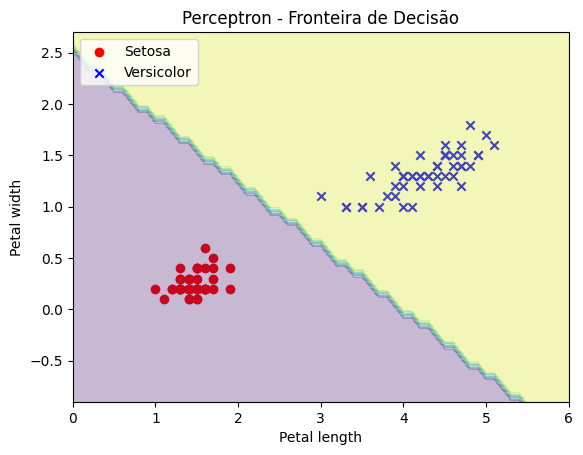

In [ ]:
# Plotando os dados e a fronteira de decisão
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='Versicolor')

# Fronteira de decisão
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                       np.arange(x2_min, x2_max, 0.1))
Z = perceptron.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.title('Perceptron - Fronteira de Decisão')
plt.show()


- `plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')`: Plota os exemplos da classe Setosa (primeiros 50 exemplos) em vermelho.
- `plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='Versicolor')`: Plota os exemplos da classe Versicolor (próximos 50 exemplos) em azul.

### Geração da Fronteira de Decisão:

`x1_min, x1_max = X[:, 0].min() - 1`


In [ ]:
from IPython.display import display

# Gerando a tabela de predições do perceptron
predicoes = perceptron.predict(X)

# Criando a tabela de resultados, com arredondamento para melhorar a legibilidade
tabela_resultados = pd.DataFrame({
    'Comprimento da Pétala': X[:, 0].round(2),
    'Largura da Pétala': X[:, 1].round(2),
    'Classe Verdadeira': y,
    'Classe Predita': predicoes
})

# Exibindo a tabela com a função display() para melhor visualização no notebook
display(tabela_resultados)


,Comprimento da Pétala,Largura da Pétala,Classe Verdadeira,Classe Predita
0,1.4,0.2,-1,-1
1,1.4,0.2,-1,-1
2,1.3,0.2,-1,-1
3,1.5,0.2,-1,-1
4,1.4,0.2,-1,-1
...,...,...,...,...
95,4.2,1.2,1,1
96,4.2,1.3,1,1
97,4.3,1.3,1,1
98,3.0,1.1,1,1


- `predicoes = perceptron.predict(X)`: Essa linha usa o perceptron treinado para fazer predições nas amostras de entrada (X), gerando uma lista de valores -1 ou 1.
- `tabela_resultados = pd.DataFrame(...)`: Aqui criamos uma tabela com as características originais (comprimento e largura das pétalas), a classe verdadeira (y) e a classe predita pelo perceptron.
### Arredondamento dos Valores:

- `X[:, 0].round(2)` e `X[:, 1].round(2)`: Arredonda os valores dos atributos (comprimento e largura da pétala) para duas casas decimais, o que torna a leitura mais agradável.
